In [1]:
import os
import os.path as op
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid", color_codes=True)
sns.set(font_scale=1.35, style="ticks") #set styling preferences
import statsmodels.api as sm
from scipy import stats
import math
from math import pi
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from scipy.spatial.distance import cdist
from scipy.cluster.vq import kmeans2,vq, whiten
import geopandas as gpd
import h5py
import boto.s3
import glob    
import boto3
from zipfile import ZipFile
import shutil

In [2]:
# Show all columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# Showing the entire number in dataframe
pd.set_option('float_format', '{:f}'.format)

#### Reading all the csv files

In [4]:
def read_csv_files():
    sf_rh_base_0p01 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-1fleet-v2/inexus/sfbay_baseline_default-1.0_2019__20230708.csv.gz', compression = 'gzip')    # Adding scenario info
    sf_rh_base_0p01['scenario'] = "baseline"
    sf_rh_base_0p01['scenario'] = sf_rh_base_0p01['scenario'].astype("category")
    sf_rh_base_0p01['lever'] = "WAV"
    sf_rh_base_0p01['lever'] = sf_rh_base_0p01['lever'].astype("category")
    sf_rh_base_0p01['year'] = 2018
    sf_rh_base_0p01['lever_position_wav'] = 0.01      
    
    sf_wav_5 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-5fleet/inexus/sfbay_baseline_default-1.0_2019__20230513.csv.gz', compression = 'gzip')
    # Adding scenario info
    sf_wav_5['scenario'] = "ridehail"
    sf_wav_5['scenario'] = sf_wav_5['scenario'].astype("category")
    sf_wav_5['lever'] = "WAV"
    sf_wav_5['lever'] = sf_wav_5['lever'].astype("category")
    sf_wav_5['year'] = 2018
    sf_wav_5['lever_position_wav'] = 0.05      
    
    sf_wav_10 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-10fleet/inexus/sfbay_baseline_default-1.0_2019__20230521.csv.gz', compression = 'gzip')
    # Adding scenario info
    sf_wav_10['scenario'] = "ridehail"
    sf_wav_10['scenario'] = sf_wav_10['scenario'].astype("category")
    sf_wav_10['lever'] = "WAV"   
    sf_wav_10['lever'] = sf_wav_10['lever'].astype("category")
    sf_wav_10['year'] = 2018
    sf_wav_10['lever_position_wav'] = 0.1        
    
    sf_wav_20 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-20fleet-v2/inexus/sfbay_baseline_default-1.0_2019__20230710.csv.gz', compression = 'gzip')
    # Adding scenario info
    sf_wav_20['scenario'] = "ridehail"
    sf_wav_20['scenario'] = sf_wav_10['scenario'].astype("category")
    sf_wav_20['lever'] = "WAV"
    sf_wav_20['lever'] = sf_wav_10['lever'].astype("category")
    sf_wav_20['year'] = 2018
    sf_wav_20['lever_position_wav'] = 0.2
    
    sf_wav_50 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-50fleet/inexus/sfbay_baseline_default-1.0_2018__20230527.csv.gz', compression = 'gzip')
    # Adding scenario info
    sf_wav_50['scenario'] = "ridehail"
    sf_wav_50['scenario'] = sf_wav_50['scenario'].astype("category")
    sf_wav_50['lever'] = "WAV"
    sf_wav_50['lever'] = sf_wav_50['lever'].astype("category")
    sf_wav_50['year'] = 2018
    sf_wav_50['lever_position_wav'] = 0.5
    
    sf_wav_100 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-100fleet/inexus/sfbay_baseline_default-1.0_2019__20230501.csv.gz', compression = 'gzip')
    # Adding scenario info
    sf_wav_100['scenario'] = "ridehail"
    sf_wav_100['scenario'] = sf_wav_100['scenario'].astype("category")
    sf_wav_100['lever'] = "WAV"
    sf_wav_100['lever'] = sf_wav_100['lever'].astype("category")
    sf_wav_100['year'] = 2018
    sf_wav_100['lever_position_wav'] = 1
    
    return (sf_rh_base_0p01, sf_wav_5, sf_wav_10, sf_wav_20, sf_wav_50, sf_wav_100)

In [5]:
%%time 
# Call the function and assign the returned values to variables
sf_rh_base_0p01, sf_wav_5, sf_wav_10, sf_wav_20, sf_wav_50, sf_wav_100 = read_csv_files()

C:\Users\nrezaei\AppData\Local\Temp\3\ipykernel_4768\1857390.py:2: DtypeWarning: Columns (77,131,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,158,167,172,174,175,176,177,179,180,237,238,239,240,249) have mixed types. Specify dtype option on import or set low_memory=False.
  sf_rh_base_0p01 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-1fleet-v2/inexus/sfbay_baseline_default-1.0_2019__20230708.csv.gz', compression = 'gzip')    # Adding scenario info
C:\Users\nrezaei\AppData\Local\Temp\3\ipykernel_4768\1857390.py:10: DtypeWarning: Columns (77,131,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,158,167,172,174,175,176,177,179,180,237,238,239,240,249) have mixed types. Specify dtype option on import or set low_memory=False.
  sf_wav_5 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-5fleet/inexus/sfbay_baseline_default-1.0_2019__20230513.csv.gz', compression = 'gzip')
C:\Users\nrezaei\AppD

CPU times: total: 7h 44s
Wall time: 7h 12min 46s


#### Baseline (No need to run if the function above was run)

In [3]:
%%time  
sf_rh_base_0p01 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-1fleet/inexus/sfbay_baseline_default-1.0_2019__20230529.csv.gz', compression = 'gzip')

<timed exec>:1: DtypeWarning: Columns (77,131,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,158,167,172,174,175,176,177,179,180,237,238,239,240,249) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: total: 13min 54s
Wall time: 16min 30s


In [5]:
# Adding scenario info
sf_rh_base_0p01['scenario'] = "baseline"
sf_rh_base_0p01['scenario'] = sf_rh_base_0p01['scenario'].astype("category")
sf_rh_base_0p01['lever'] = "WAV"
sf_rh_base_0p01['lever'] = sf_rh_base_0p01['lever'].astype("category")
sf_rh_base_0p01['year'] = 2018
sf_rh_base_0p01['lever_position_wav'] = 0.01

In [6]:
#baseline2018 = "https://beam-core-act.s3.amazonaws.com/beam-outputs/pilates-outputs/sfbay-baseline-20221220/inexus"
#sfbase = pd.read_csv(baseline2018 + 'sfbay_baseline_default-1.0_2012__20221219.csv.gz')

#### Ridehail Price Scenarios (No need to run if the function above was run)

In [10]:
%%time  
sf_wav_5 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-5fleet/inexus/sfbay_baseline_default-1.0_2019__20230513.csv.gz', compression = 'gzip')

<timed exec>:1: DtypeWarning: Columns (77,131,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,158,167,172,174,175,176,177,179,180,237,238,239,240,249) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: total: 41min 8s
Wall time: 43min 35s


In [11]:
# Adding scenario info
sf_wav_5['scenario'] = "ridehail"
sf_wav_5['scenario'] = sf_wav_5['scenario'].astype("category")
sf_wav_5['lever'] = "WAV"
sf_wav_5['lever'] = sf_wav_5['lever'].astype("category")
sf_wav_5['year'] = 2018
sf_wav_5['lever_position_wav'] = 0.05

In [12]:
%%time
sf_wav_10 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-10fleet/inexus/sfbay_baseline_default-1.0_2019__20230521.csv.gz', compression = 'gzip')

<timed exec>:1: DtypeWarning: Columns (77,131,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,158,167,172,174,175,176,177,179,180,237,238,239,240,249) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: total: 1h 3min 47s
Wall time: 1h 6min 41s


In [13]:
# Adding scenario info
sf_wav_10['scenario'] = "ridehail"
sf_wav_10['scenario'] = sf_wav_10['scenario'].astype("category")
sf_wav_10['lever'] = "WAV"
sf_wav_10['lever'] = sf_wav_10['lever'].astype("category")
sf_wav_10['year'] = 2018
sf_wav_10['lever_position_wav'] = 0.1

In [14]:
%%time 
sf_wav_20 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-20fleet/inexus/sfbay_baseline_default-1.0_2019__20230521.csv.gz', compression = 'gzip')

<timed exec>:1: DtypeWarning: Columns (77,131,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,158,167,172,174,175,176,177,179,180,237,238,239,240,249) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: total: 1h 17min 12s
Wall time: 1h 18min 49s


In [15]:
# Adding scenario info
sf_wav_20['scenario'] = "ridehail"
sf_wav_20['scenario'] = sf_wav_10['scenario'].astype("category")
sf_wav_20['lever'] = "WAV"
sf_wav_20['lever'] = sf_wav_10['lever'].astype("category")
sf_wav_20['year'] = 2018
sf_wav_20['lever_position_wav'] = 0.2

In [16]:
%%time 
sf_wav_50 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-50fleet/inexus/sfbay_baseline_default-1.0_2018__20230527.csv.gz', compression = 'gzip')

CPU times: total: 1h 28min 8s
Wall time: 1h 30min 46s


In [17]:
# Adding scenario info
sf_wav_50['scenario'] = "ridehail"
sf_wav_50['scenario'] = sf_wav_50['scenario'].astype("category")
sf_wav_50['lever'] = "WAV"
sf_wav_50['lever'] = sf_wav_50['lever'].astype("category")
sf_wav_50['year'] = 2018
sf_wav_50['lever_position_wav'] = 0.5

In [18]:
%%time  
sf_wav_100 = pd.read_csv('gs://beam-core-outputs/wheelchair/may2023/sfbay-10pop-100fleet/inexus/sfbay_baseline_default-1.0_2019__20230501.csv.gz', compression = 'gzip')

<timed exec>:1: DtypeWarning: Columns (77,131,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,158,167,172,174,175,176,177,179,180,237,238,239,240,249) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: total: 1h 43min 49s
Wall time: 1h 46min 15s


In [19]:
# Adding scenario info
sf_wav_100['scenario'] = "ridehail"
sf_wav_100['scenario'] = sf_wav_100['scenario'].astype("category")
sf_wav_100['lever'] = "WAV"
sf_wav_100['lever'] = sf_wav_100['lever'].astype("category")
sf_wav_100['year'] = 2018
sf_wav_100['lever_position_wav'] = 1

In [20]:
#sf_rh_flsz_175 = sf_rh_flsz_175.drop(sf_rh_flsz_175.columns[233:235], axis=1)

#### Stacked File

In [6]:
frames = [sf_rh_base_0p01, sf_wav_5, sf_wav_10, sf_wav_20, sf_wav_50, sf_wav_100]
sf_stacked = pd.concat(frames)

In [7]:
sf_stacked = sf_stacked.drop(['has_school_kid','has_preschool_kid','has_retiree','has_non_worker','adult','hispanic','relate',
                              'pstudent','pemploy','ptype','p_hispanic','age_16_p','age_16_to_19',
                              'person_age','MAR','hours','hispanic.1','student',
                              'worker','stop_frequency','composition','tdd','number_of_participants','tour_type_count',
                              'tour_type_num','tour_num','tour_count', 'outbound', 'trip_num','num_under16_not_at_school',
                              'family','non_family','num_young_adults','num_college_age','num_children_16_to_17',
                              'num_children_5_to_15','num_young_children',
                              'vehicleIds_estimate','parent_tour_id','atwork_subtour_frequency','household_id_y',
                              'male','female', 'has_driving_kid','has_full_time','has_part_time',
                              'has_university','student_is_employed', 'nonstudent_to_school', 'is_student','is_gradeschool',
                              'is_gradeschool','is_highschool','is_university','school_segment','is_worker',  
                              'distance_to_school','roundtrip_auto_time_to_school',
                              'distance_to_work','workplace_in_cbd', 'work_taz_area_type', 'hh_race_of_head',
                              'roundtrip_auto_time_to_work','work_auto_savings_ratio','cdap_activity', 'travel_active', 
                              'under16_not_at_school','has_preschool_kid_at_home', 'gt2','hispanic_head',
                              'has_school_kid_at_home','work_and_school_and_worker', 'age_of_head', 'race_of_head',
                              'work_and_school_and_student', 'VEHICL','hh_children','hh_age_of_head','num_workers',
                              'gt55','seniors', 'recent_mover', 'hh_workers', 'hispanic_status_of_head', 'hh_seniors', 
                              'hh_type', 'HHT', 'sample_rate', 'chunk_id', 'income_segment', 'num_non_workers', 
                              'num_drivers', 'num_adults', 'num_children', 'hh_work_auto_savings_ratio', 'num_travel_active', 
                              'num_travel_active_adults','num_travel_active_preschoolers', 'num_travel_active_children', 
                              'num_travel_active_non_preschoolers', 'participates_in_jtf_model', 'joint_tour_frequency',
                              'num_hh_joint_tours', 'serialno', 'sf_detached', 'household_id_x','destination_logsum_y','logsum_tours_mode_AS_tours',
                              'primary_purpose_y','PNUM','work_auto_savings','mandatory_tour_frequency',
                              'num_work_tours','num_joint_tours', 'non_mandatory_tour_frequency',
                              'num_non_mand','num_escort_tours','num_eatout_tours','num_shop_tours',
                              'num_maint_tours','num_discr_tours','num_social_tours','num_non_escort_tours',
                              'Unnamed: 0.1','Unnamed: 0',
                              'median_value_of_time','tenure',
                              'tenure_mover','emissionFood','emissionElectricity','emissionDiesel',
                             'emissionGasoline','emissionBiodiesel','fuelFood','fuelElectricity',
                             'fuelBiodiesel','fuel_not_Food','fuelDiesel','transit_rail','transit_bus',
                             'ride_hail_pooled','transit_cable_car','transit_tram','transit_subway',
                             'parkingType','transit_cable_car','transit_tram','transit_subway',
                             'trip_count', 'mode_choice_actual_5','distance_mode_choice',
                              'income_in_thousands', 'TAZ_y', 'hh_income', 
                              'income_quartiles','num_mand','free_parking_at_work','workplace_location_logsum',
                             'workplace_taz','school_taz','home_taz','home_y', 'home_x', 
                             'TAZ_x','work_zone_id','work_at_home','race_id', 'school_zone_id',
                             'edu','sex','earning','tour_mode_AS_tours', 'destination_x', 'origin_x', 
                             'tour_id','household_id','person_id', 'fuelGasoline',
                             'duration_in_transit', 'distance_walking', 'distance_bike',
                             'distance_ridehail', 'distance_bike', 'distance_privateCar', 'distance_transit', 
                              'duration_in_ridehail', 'duration_on_bike', 'duration_in_privateCar'], axis=1)

In [8]:
sf_stacked = sf_stacked.sort_values(by=['IDMerged', 'tripIndex', 'lever_position_wav']).reset_index(drop=True)

In [9]:
sf_stacked['door_to_door_time_relative_to_baseline'] = sf_stacked['duration_door_to_door'] - (sf_stacked['duration_door_to_door'].where(sf_stacked['lever_position_wav'].eq(0.01))
                                                                                                  .groupby([sf_stacked['IDMerged'],sf_stacked['tripIndex']])
                                                                                                   .transform('first')
                                                                                                   .convert_dtypes())

In [10]:
# Add the mandatory category column
mandatory = ['work' , 'univ', 'school']
sf_stacked['mandatoryCat'] = np.where((sf_stacked.actEndType.isin(mandatory)) & (sf_stacked.actStartType.isin(mandatory)), 'from_M_to_M' , None)

In [11]:
sf_stacked['mandatoryCat'] = np.where((sf_stacked.actEndType == 'Home') & (sf_stacked.actStartType.isin(mandatory)), 'from_H_to_M' , sf_stacked['mandatoryCat'])

In [12]:
sf_stacked['mandatoryCat'] = np.where((sf_stacked.actEndType.isin(mandatory)) & (sf_stacked.actStartType == "Home"), 'from_M_to_H' , sf_stacked['mandatoryCat'])

In [13]:
non_mandatory = ['othmaint' , 'othdiscr', 'escort', 'eatout', 'social', 'shopping', 'atwork']
sf_stacked['mandatoryCat'] = np.where((sf_stacked.actEndType.isin(non_mandatory)) & (sf_stacked.actStartType.isin(non_mandatory)), 'from_N_to_N' , sf_stacked['mandatoryCat'])

In [14]:
#%%time
#sf_stacked_tr_fr.to_csv('s3://beam-core-act/deepDive/CleanData/SanFrancisco/Stacked/sf_2018_stacked_tr_fr_v3.csv', index=False)

In [15]:
sf_stacked[sf_stacked['SHARED3FREE'].isna()].shape

(468096, 98)

In [16]:
sf_stacked = sf_stacked[sf_stacked['income'].notna()]

In [44]:
# add a lower and upper range for the bins in pd.cut
#quartiles = [0] + quartiles + [float('inf')]

In [45]:
# add a quartiles column to groups, using pd.cut
#sf_stacked['income_quartiles'] = pd.cut(sf_stacked['income'], bins=quartiles, labels=['1stQ', '2ndQ', '3rdQ', '4thQ'])

In [17]:
sf_stacked['socialCarbonCost'] = sf_stacked['emission_marginal']*185 # 51 or 102

In [18]:
#sf_stacked.to_csv('s3://beam-core-act/deepDive/CleanData/SanFrancisco/Stacked/sf_2018_stacked_rh_WAV.csv', index=False)

In [19]:
%%time
import gzip
from io import BytesIO
from google.cloud import storage
import pandas as pd

# Export DataFrame to a gzip-compressed CSV file
compressed_bytes = BytesIO()
with gzip.GzipFile(fileobj=compressed_bytes, mode='w') as gz:
    sf_stacked.to_csv(gz, index=False)
compressed_bytes.seek(0)

# Upload the gzip-compressed file to Google Cloud Storage
storage_client = storage.Client.from_service_account_json('C:/Users/nrezaei/Documents/beam-core-a9ea929e82b1.json')
bucket_name = 'beam-core-analysis'  # Replace with your Google Cloud Storage bucket name
destination_blob_name = 'sf_2018_stacked_rh_WAV_20230711.csv.gz'  # Replace with the desired destination file name in the bucket

bucket = storage_client.bucket(bucket_name)
blob = bucket.blob(destination_blob_name)
blob.upload_from_file(compressed_bytes, content_type='application/gzip')

# Set the Content-Encoding metadata property
blob.metadata = {'Content-Encoding': 'gzip'}
blob.patch()

CPU times: total: 2h 38min 36s
Wall time: 2h 40min 12s


In [ ]:
%%time
#test_wav = pd.read_csv('gs://beam-core-analysis/sf_2018_stacked_rh_WAV_20230626.csv.gz', compression = 'gzip')

In [ ]:
#sf_stacked.to_csv('gs://beam-core-analysis/stacked/sf_2018_stacked_rh_WAV_20230603.csv', index=False)

In [26]:
categorical_vars = ['lever_position_wav', 'in_wheelchair', 'mode_choice_planned_BEAM','mode_choice_actual_BEAM']
grouped_data = sf_stacked.groupby(categorical_vars).describe().reset_index()
grouped_data.to_csv('summary_stats_wav_v2.csv', index=False)

In [65]:
only_rh1 = sf_stacked[(sf_stacked['mode_choice_planned_BEAM'] == 'ride_hail')|
               (sf_stacked['mode_choice_planned_BEAM'] == 'ride_hail_pooled')]

In [66]:
only_rh1.loc[only_rh1['lever_position_wav'] == 1].shape

(301643, 99)

In [67]:
only_rh1.loc[only_rh1['lever_position_wav'] == 1].groupby('in_wheelchair')['tripIndex'].count()

in_wheelchair
False    298626
True       3017
Name: tripIndex, dtype: int64

In [79]:
rh_planned = {'lever_position_wav': [0.01, 0.05, 0.1 , 0.2 , 0.5 , 1],
              'planned_rh': [2161,1485,2041,2506,3114,3017],
              'planned_rh_100': [3017, 3017, 3017, 3017, 3017, 3017],
              'replanning_num': [1010,780,977,1097,1274,1116]}

In [80]:
df_rh_planned = pd.DataFrame(rh_planned)

In [81]:
df_rh_planned['replanning_rate'] = df_rh_planned['replanning_num']/df_rh_planned['planned_rh_100']

In [85]:
df_rh_planned['gave_up_rh'] = df_rh_planned['planned_rh_100']-df_rh_planned['planned_rh']

In [86]:
df_rh_planned['replanned_gave_up_rh'] = df_rh_planned['gave_up_rh']+df_rh_planned['replanning_num']

In [87]:
df_rh_planned

,lever_position_wav,planned_rh,planned_rh_100,replanning_num,replanning_rate,gave_up_rh,replanned_gave_up_rh
0,0.010000,2161,3017,1010,0.334770,856,1866
1,0.050000,1485,3017,780,0.258535,1532,2312
2,0.100000,2041,3017,977,0.323832,976,1953
3,0.200000,2506,3017,1097,0.363606,511,1608
4,0.500000,3114,3017,1274,0.422274,-97,1177
5,1.000000,3017,3017,1116,0.369904,0,1116


In [88]:
only_rh = sf_stacked[(sf_stacked['mode_choice_actual_BEAM'] == 'ride_hail')|
               (sf_stacked['mode_choice_actual_BEAM'] == 'ride_hail_pooled')|
               (sf_stacked['mode_choice_planned_BEAM'] == 'ride_hail')|
               (sf_stacked['mode_choice_planned_BEAM'] == 'ride_hail_pooled')]

In [22]:
only_rh['replanned'] = only_rh['replanning_status'].apply(lambda x: 1 if x > 0 else 0)

C:\Users\nrezaei\AppData\Local\Temp\3\ipykernel_4768\2770517484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_rh['replanned'] = only_rh['replanning_status'].apply(lambda x: 1 if x > 0 else 0)


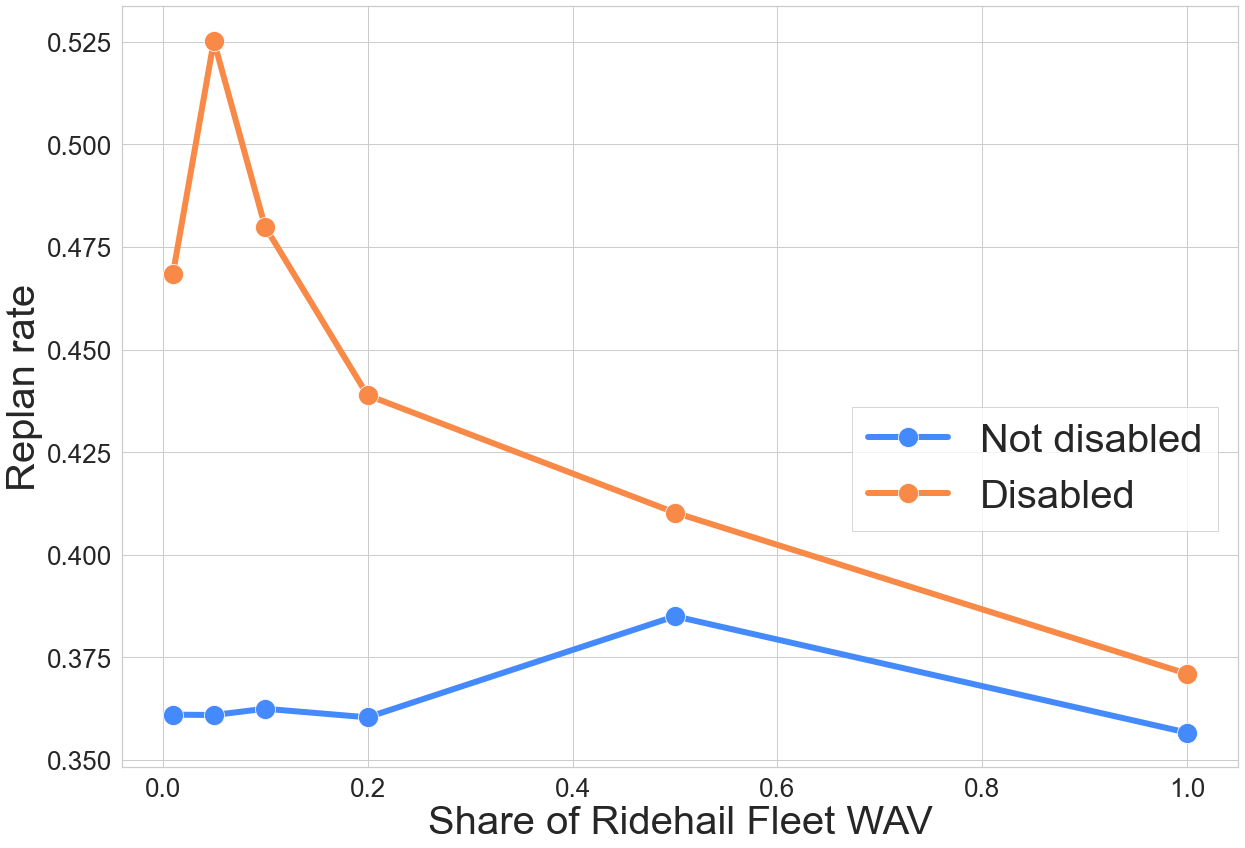

In [23]:
sns.set(rc={'figure.figsize':(20,14)})
sns.set_theme(style="whitegrid")
colors = ['#458AFC', '#F88947'] #'#CC3311','#009988', '#F4A582', '#BBCC33'
ax = sns.lineplot(data = only_rh, x = 'lever_position_wav', 
                  y = 'replanned', marker='o', hue = 'in_wheelchair',
                  markersize=20, ci=None, linewidth = 6, palette=colors)
ax.set_xlabel('Share of Ridehail Fleet WAV', fontsize = 40)
ax.set_ylabel('Replan rate', fontsize = 40)
ax.yaxis.set_tick_params(labelsize = 26)
ax.xaxis.set_tick_params(labelsize = 26)

plt.legend(labels = ['Not disabled', 'Disabled'],
         fontsize='small', fancybox=False, bbox_to_anchor=(1, 0.5), ncol=1, frameon=True, loc = 'best', prop={'size': 40})

In [53]:
cd = sf_stacked.groupby(['lever_position_wav', 'in_wheelchair'])['mode_choice_actual_BEAM'].value_counts(normalize=True,sort=False).reset_index(name='Percentage')

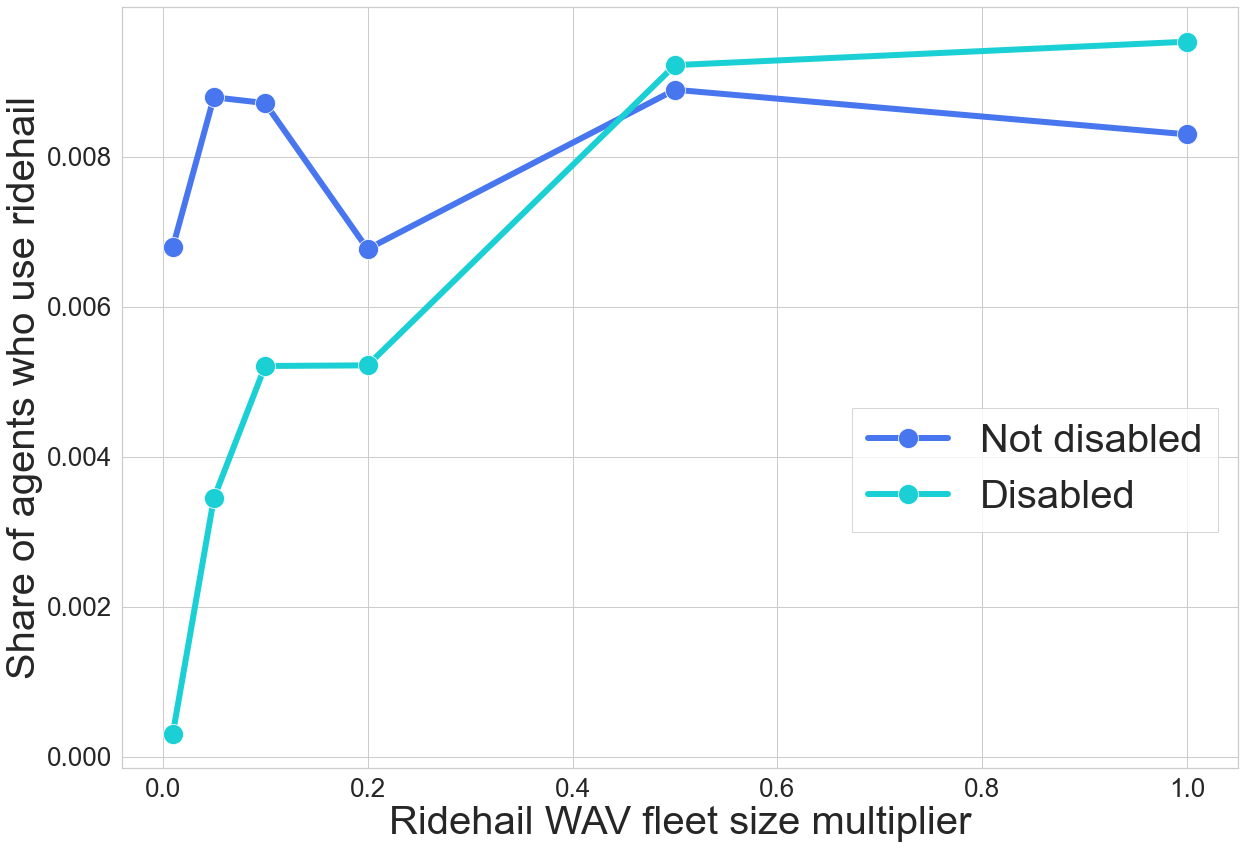

In [54]:
sns.set(rc={'figure.figsize':(20,14)})
sns.set_theme(style="whitegrid")
sns.set_palette("turbo")
ax = sns.lineplot(data = cd.loc[(cd['mode_choice_actual_BEAM']=='ride_hail')|
                               (cd['mode_choice_actual_BEAM']=='ride_hail_pooled')], x = 'lever_position_wav', 
                  y = 'Percentage', marker='o', hue = 'in_wheelchair',
                  markersize=20, ci=None, linewidth = 6)
ax.set_xlabel('Ridehail WAV fleet size multiplier', fontsize = 40)
ax.set_ylabel('Share of agents who use ridehail', fontsize = 40)
ax.yaxis.set_tick_params(labelsize = 26)
ax.xaxis.set_tick_params(labelsize = 26)

plt.legend(labels = ['Not disabled', 'Disabled'],
         fontsize='small', fancybox=False, bbox_to_anchor=(1, 0.5), ncol=1, frameon=True, loc = 'best', prop={'size': 40})
#plt.savefig('share_agents_ridehail_WAV.svg', format='svg')
#plt.savefig('share_agents_ridehail_WAV.png', dpi=500)

In [56]:
sf_stacked['denial'] = np.where(sf_stacked['replanning_status'] > 0, 1, 0)

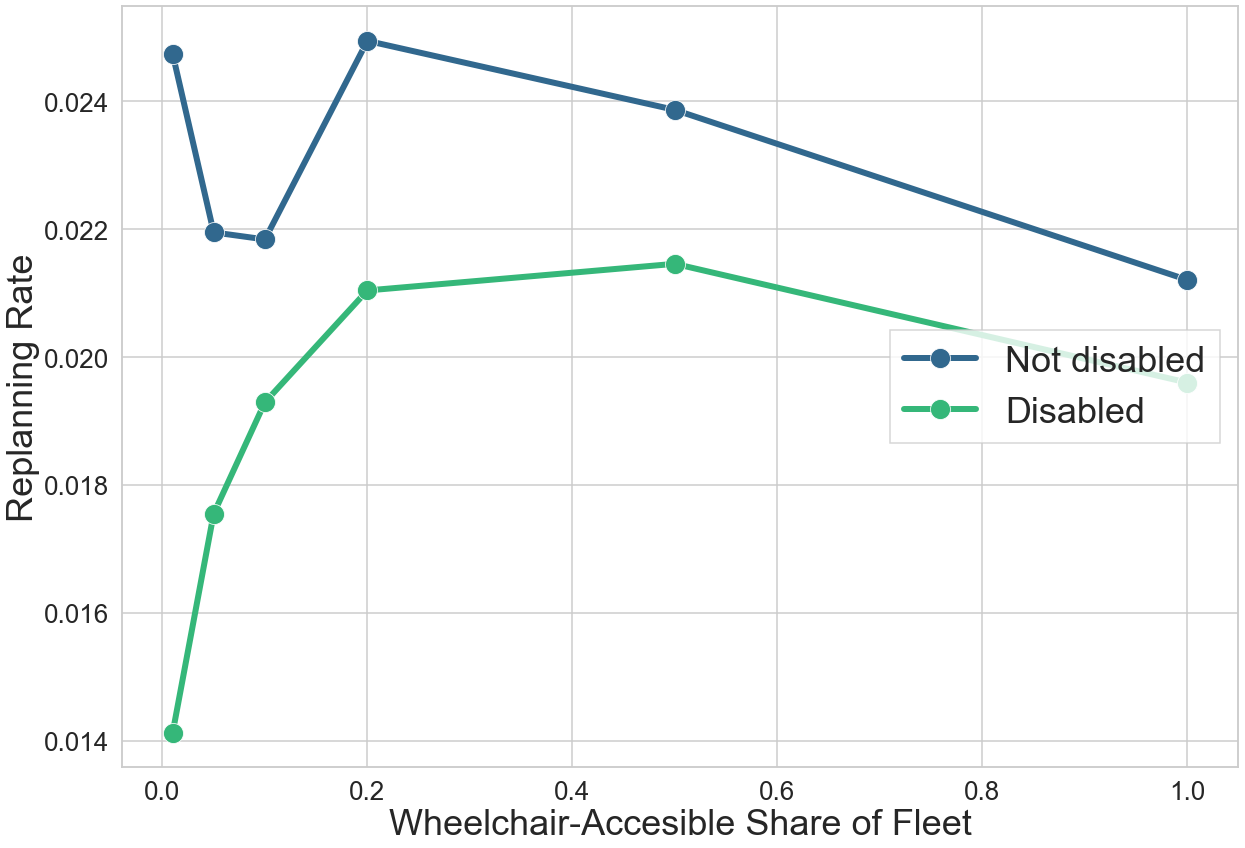

In [105]:
sns.set(rc={'figure.figsize': (20, 14)})
sns.set_context('talk')
sns.set_style("whitegrid", {'gridcolor': 'grainsboro'})

grid = sns.lineplot(data=sf_stacked, x='lever_position_wav', y='denial', hue='in_wheelchair',
                    palette='viridis', marker='o', ci=None, markersize=20,  linewidth = 6)


plt.legend(labels = ['Not disabled', 'Disabled'],
         fontsize='small', fancybox=False, ncol=1, frameon=True, loc = 'right', prop={'size': 36})

grid.set_xlabel('Wheelchair-Accesible Share of Fleet', fontsize = 36)
grid.set_ylabel('Replanning Rate', fontsize = 36)
grid.yaxis.set_tick_params(labelsize = 26)
grid.xaxis.set_tick_params(labelsize = 26)

#plt.legend(bbox_to_anchor = (1.40, 1.02), fontsize = 10)
#plt.savefig('Replanning2.tif', bbox_inches='tight', dpi=300)

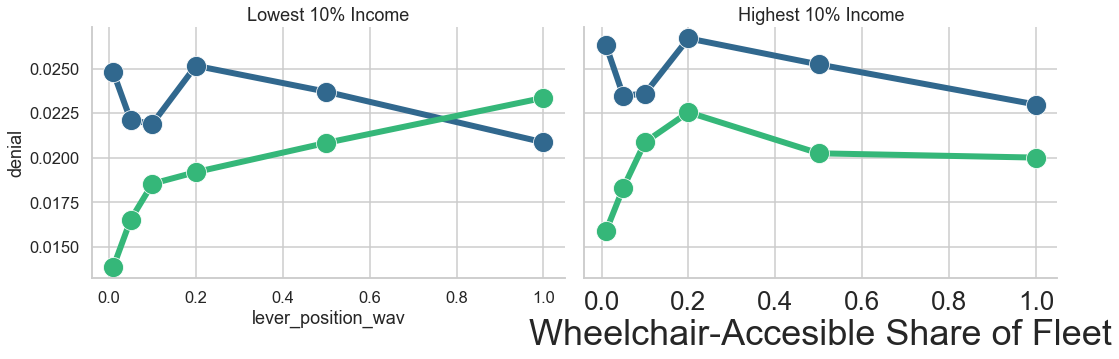

In [107]:
sns.set(rc={'figure.figsize': (20, 14)})
sns.set_context('talk')
sns.set_style("whitegrid", {'gridcolor': 'grainsboro'})

grid = sns.FacetGrid(sf_stacked.loc[(sf_stacked['income_deciles'] == '1stD') | (sf_stacked['income_deciles'] == '10thD')],
                     col='income_deciles', hue='in_wheelchair', height=5, aspect=1.5, palette='viridis', legend_out=True)

grid.map(sns.lineplot, 'lever_position_wav', 'denial', marker='o', 
         ci=None, markersize=10,  linewidth = 3)


for ax, title in zip(grid.axes.flat, ['Lowest 10% Income','Highest 10% Income']):
    ax.set_title(title)

#ax.set_xlabel('Wheelchair-Accesible Share of Fleet', fontsize = 36)
#ax.set_ylabel('Replanning Rate', fontsize = 36)
#ax.yaxis.set_tick_params(labelsize = 26)
#ax.xaxis.set_tick_params(labelsize = 26)

In [133]:
income_sf_stacked = sf_stacked.loc[(sf_stacked['income_deciles'] == '1stD')|(sf_stacked['income_deciles'] == '10thD')]

In [140]:
rh_sf_stacked = sf_stacked.loc[(sf_stacked['mode_choice_actual_BEAM'] == 'ride_hail')|(sf_stacked['mode_choice_actual_BEAM'] == 'ride_hail_pooled')]

In [150]:
rh_sf_stacked.shape

(1186865, 95)

In [163]:
ride_hail_users = rh_sf_stacked.groupby('lever_position_wav')['tripIndex'].nunique().reset_index()

In [164]:
#ride_hail_users.rename(columns={'trip_id': 'ride_hail_users'}, inplace=True)

# Merge the ride_hail_users DataFrame with the original DataFrame
df = pd.merge(rh_sf_stacked, ride_hail_users, on='lever_position_wav', how='left')

In [165]:
# Calculate the replanning rate per user or vehicle
df['replanning_rate'] = df['denial'] / df['tripIndex_y']

In [166]:
#mean_replanning = rh_sf_stacked.groupby(['in_wheelchair', 'lever_position_wav'])['denial'].mean().reset_index()

Text(0.5, 1.0, 'Comparison of Replanning Rate for Disabled and Non-Disabled Ridehail Users')

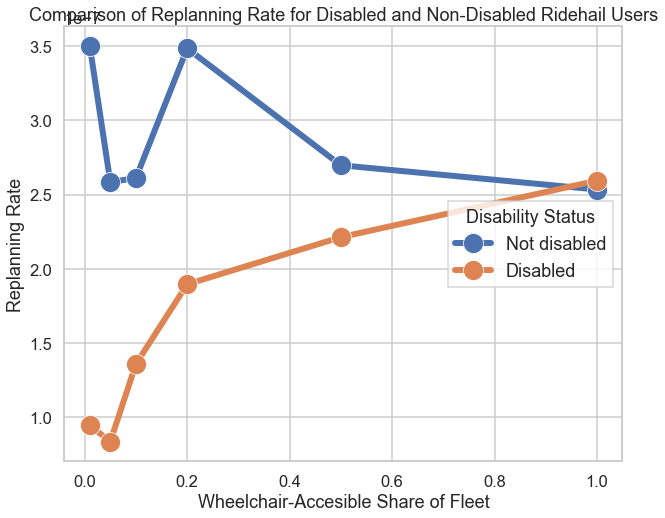

In [167]:
sns.set(rc={'figure.figsize': (10, 8)})
sns.set_context('talk')
sns.set_style("whitegrid", {'gridcolor': 'grainsboro'})

sns.lineplot(data=df, x='lever_position_wav', y='replanning_rate', hue='in_wheelchair', marker='o', ci=None, markersize=20,  linewidth = 6)

plt.legend(title='Disability Status', labels = ['Not disabled', 'Disabled'],
         fontsize='small', fancybox=False, ncol=1, frameon=True, loc = 'right', prop={'size': 18})
           
plt.xlabel('Wheelchair-Accesible Share of Fleet')
plt.ylabel('Replanning Rate')
plt.title('Comparison of Replanning Rate for Disabled and Non-Disabled Ridehail Users')